
# IPAN - ImageJ Processing Assistant Notebook

## 02 - Working with ImageJ pt.2
**PlugIns and generalized macro functions**

***
### Import Libraries and packages 

In [1]:
import scyjava                    # {optional} Set memory pool
from skimage import io            # ImageJ opener, open the image on the background ImageJ
from IPython.display import Image # Display only images
import os                         # Used to manipulate and create directory with python.
import tifffile                   # Save .tif files from numpy arrays

***

### Import ImageJ

By default, the ImageJ2 gateway will not include the legacy layer for backwards compatibility with the original ImageJ. The legacy layer is necessary for macros and any ImageJ-based plugins. 
In order to use original ImageJ macros, plugins, or other code you must initiate the environment with **legacy supported** (second argument of the imagej initialization). If in doubt, you can check the ij.legacy().isActive() function to see if your initialization worked properly. 
With the following initialization we can work with ImageJ1 plugins with a stable annd fixed version of the software (first argument of the imagej initialization). 
In alternative (shown belox a text), we can import the desired list of plugins from a local repository.

Run the imageJ initilization **only 1 time**, otherwie the legacy state becomes inactive

In [2]:
%%capture test
## Change the memory pool if required
#scyjava.config.add_options('-Xmx2g') # <--- Example: set 2G memory.

import imagej
ij = imagej.init(['sc.fiji:fiji:2.0.0-pre-10', 'net.imagej:imagej-legacy'])

log4j:WARN No appenders could be found for logger (org.bushe.swing.event.EventService).
log4j:WARN Please initialize the log4j system properly.
log4j:WARN See http://logging.apache.org/log4j/1.2/faq.html#noconfig for more info.


18:32:39.720 [SciJava-6063d53e-Thread-0] DEBUG loci.formats.ClassList - Could not find loci.formats.in.SlideBook6Reader
java.lang.ClassNotFoundException: loci.formats.in.SlideBook6Reader
	at java.net.URLClassLoader.findClass(URLClassLoader.java:382)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:419)
	at sun.misc.Launcher$AppClassLoader.loadClass(Launcher.java:352)
	at java.lang.ClassLoader.loadClass(ClassLoader.java:352)
	at java.lang.Class.forName0(Native Method)
	at java.lang.Class.forName(Class.java:264)
	at loci.formats.ClassList.parseLine(ClassList.java:196)
	at loci.formats.ClassList.parseFile(ClassList.java:258)
	at loci.formats.ClassList.<init>(ClassList.java:138)
	at loci.formats.ClassList.<init>(ClassList.java:122)
	at loci.formats.ImageReader.getDefaultReaderClasses(ImageReader.java:79)
	at io.scif.bf.BioFormatsFormat.cacheReaderClasses(BioFormatsFormat.java:489)
	at io.scif.bf.BioFormatsFormat.<init>(BioFormatsFormat.java:138)
	at sun.reflect.NativeConstructorAccesso

In [3]:
print("The actual version of ImageJ is:", ij.getApp().getInfo(True))

The actual version of ImageJ is: ImageJ 2.0.0-rc-71/1.52i; Java 1.8.0_302 [x86_64]; 20MB of 910MB


ALTERNATIVE initialization (make it a code chunk to run):

#Upload local plugins

plugins_dir = '/Applications/Fiji.app/plugins'

scyjava.config.add_option(f'-Dplugins.dir={plugins_dir}')

#Initialize ImageJ with legacy for retrocompatibility with IMAGEJ1

ij = imagej.init(['net.imagej:imagej', 'net.imagej:imagej-legacy'])

With the forollowing command we can ask if the legagy for retrocompatibility is active. To run this notebook is essential that the legacy is ACTIVE.

In [4]:
print("Legacy state: Is active?", ij.legacy.isActive())

Legacy state: Is active? True


***
### Run a PLUG IN to process the image

#### Filters

Open the image within a Macro and show it to screen

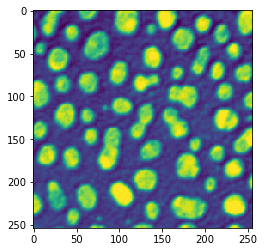

In [5]:
ij.py.run_macro("""run("Blobs (25K)");""")  # Open the sample blob image
blobs = ij.py.active_image_plus()           # Assign it to a JN varible
ij.py.show(blobs)

Run a plugin mean (IJ1 plugin) and display the result to screen

In [6]:
plugin = 'Mean'
args = {
    'block_radius_x': 10,
    'block_radius_y': 10            
}
ij.py.run_plugin(plugin, args)

<java object 'org.scijava.script.ScriptModule'>

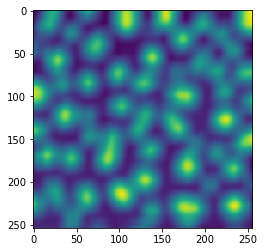

In [7]:
filtered_blobs = ij.py.active_image_plus()
ij.py.show(filtered_blobs)

Perform the image processing filter on a local image previously opened with the macro

In [8]:
#DEFINE INPUT AND OUTPUT
cwd = os.getcwd() #Get current directory
IMAGES_dir = cwd + "/IMAGES"
RESULTS_dir = cwd + "/RESULTS"

try:
    os.mkdir(RESULTS_dir)  
except FileExistsError:
    print("This directory already exist!")
    
print("The images are imported from: ", IMAGES_dir)
print("The results are exported in: ", RESULTS_dir)

This directory already exist!
The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS


In [9]:
# FOR ALL THE FOLLOWING MACRO 
# The arguments input/ouput directories will be the same.
# The arguments input/ouput filename will be defined before running the macro.

INPUT_filename = "input filename"  # <--- THIS VARIABLE MUST BE RE-SET  BEFORE CALLING THE MACRO 
OUTPUT_filename = "output filename"  # <--- THIS VARIABLE MUST BE RE-SET BEFORE CALLING THE MACRO 

args_IO = {
    'dir_in': f"{IMAGES_dir}",          
    'dir_out' : f"{RESULTS_dir}",
    'filename_in' : f"{INPUT_filename}",
    'filename_out' : f"{OUTPUT_filename}"   
}

In [10]:
#OPEN THE IMAGE and compute the IMAGE PROFILE
macro_OpenProfile = """
//DEFINE IO
#@ String dir_in
#@ String dir_out
#@ String filename_in
#@ String filename_out
#@output String path_in
#@output String path_out

path_in = dir_in + "/" + filename_in
path_out = dir_out + "/" + filename_out

//OPEN IMAGE
open(path_in)

//MAKE AND SAVE PROFILE ON ORIGINAL IMAGE
H = getHeight();
W = getWidth();
makeLine(0, 0, W, H);
run("Plot Profile");
saveAs(".png", path_out);

//SELECT IMAGE FOR NEXT STEP 
selectWindow(filename_in);
"""

In [11]:
args_IO['filename_in'] = "image_test2.tif"
args_IO['filename_out'] = "image_test2_profile.png"

result = ij.py.run_macro(macro_OpenProfile, args_IO)

INPUT_path = result.getOutput("path_in")
OUTPUT_path = result.getOutput("path_out")

print("\nINPUT file:", INPUT_path)
print("\nOUTPUT file:", OUTPUT_path)

[INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_profile.png]]

INPUT file: /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2.tif

OUTPUT file: /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_profile.png


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_profile.png]]


Show the original image and the profile computed on it. We can show the image just opened with the macroOpenProfile because of the last line of the macro *selectWindow(filename_in)* that select the the image of interest and allow to display it to screen by calling the *ij.py.active_image_plus()* command.


ORIGINAL IMAGE:


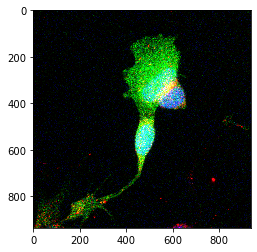


ORIGINAL IMAGE PROFILE:


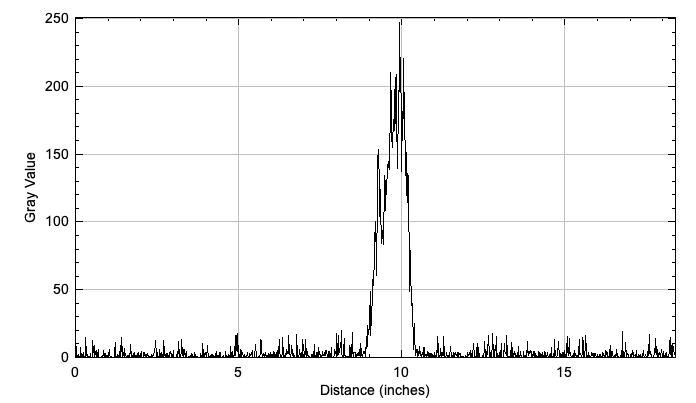

In [12]:
analysed_image = ij.py.active_image_plus()
print("\nORIGINAL IMAGE:")
ij.py.show(analysed_image)

print("\nORIGINAL IMAGE PROFILE:")
Image(f"{OUTPUT_path}")

By running the plugin we process the last active image on ImageJ. We can then compute the profile on the processed picture after save it and show it to screen.

In [13]:
plugin = 'Mean'
args_mean = { 
    'block_radius_x': 30,
    'block_radius_y': 30
}
ij.py.run_plugin(plugin, args_mean)

<java object 'org.scijava.script.ScriptModule'>

After running the plugin, the filtered image is active one. At this point, by running a macro we would modify this image. Also here we can see and display the image to screen by calling the *ij.py.active_image_plus()* command.

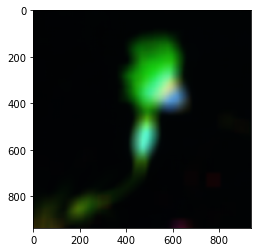

In [14]:
filtered = ij.py.active_image_plus()
ij.py.show(filtered)

**HOW TO SAVE:** To save this file from the notebook we need to convert the resulted image in a numpy array with *ij.py.from_java()* command and then write the file as .tif with the *tifffile.imwrite()* command. For this purpose we need to specify the destination path.

In [15]:
#Convert to numpy
numpy_filtered = ij.py.from_java(filtered)
print(type(numpy_filtered))

<class 'xarray.core.dataarray.DataArray'>


In [16]:
#Save with tifffile to IMAGES_dir so that we can use it for future processing
tosave_path_file = IMAGES_dir + "/image_test2_filtered.tif"
tifffile.imwrite(tosave_path_file, numpy_filtered, imagej=True) 

In [17]:
#Re-open the previous image as demonstration
saved_image = ij.io().open(tosave_path_file)

18:33:00.656 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is x86_64
18:33:00.658 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
18:33:00.659 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
18:33:00.660 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/osx_64/
18:33:00.661 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
18:33:00.662 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/osx_64/libturbojpeg.dylib
18:33:00.663 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is osx_64/
18:33:00.664 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
18:33:00.665 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find r

[java.lang.Enum.toString] 18:33:00.656 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - processor is INTEL_64 os.arch is x86_64
[java.lang.Enum.toString] 18:33:00.658 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
[java.lang.Enum.toString] 18:33:00.659 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - architecture is OSX_64 os.name is mac os x
[java.lang.Enum.toString] 18:33:00.660 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is natives/osx_64/
[java.lang.Enum.toString] 18:33:00.661 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - mappedLib is libturbojpeg.dylib
[java.lang.Enum.toString] 18:33:00.662 [AWT-AppKit] DEBUG org.scijava.nativelib.BaseJniExtractor - Couldn't find resource natives/osx_64/libturbojpeg.dylib
[java.lang.Enum.toString] 18:33:00.663 [AWT-AppKit] DEBUG org.scijava.nativelib.NativeLibraryUtil - platform specific path is osx_64/
[java.lang.

18:33:01.008 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:254)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:371)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:341)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:316)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:82)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:64)
	at org.scijava.io.IOService.getOpener(IOService.java:55)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:66)
Caused by: org.xml.sax.SAXParseException: Content is not all

[java.lang.Enum.toString] 18:33:01.008 [AWT-AppKit] DEBUG loci.formats.in.LeicaSCNReader - XML parsing failed
java.io.IOException: null
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:559)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:533)
	at loci.common.xml.XMLTools.parseXML(XMLTools.java:504)
	at loci.formats.in.LeicaSCNReader.isThisType(LeicaSCNReader.java:109)
	at loci.formats.ImageReader.isThisType(ImageReader.java:254)
	at io.scif.bf.BioFormatsFormat$Checker.isFormat(BioFormatsFormat.java:371)
	at io.scif.services.DefaultFormatService.getFormatList(DefaultFormatService.java:341)
	at io.scif.services.DefaultFormatService.getFormat(DefaultFormatService.java:316)
	at io.scif.services.DefaultDatasetIOService.canOpen(DefaultDatasetIOService.java:82)
	at io.scif.io.DatasetIOPlugin.supportsOpen(DatasetIOPlugin.java:64)
	at org.scijava.io.IOService.getOpener(IOService.java:55)
	at org.scijava.io.DefaultIOService.open(DefaultIOService.java:66)
Caused by: org.xml.sax.SAXParseExc

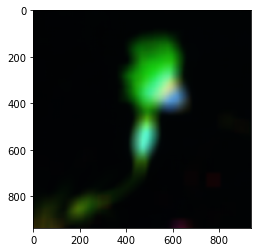

In [18]:
ij.py.show(saved_image)

Now, to compute the profile on the filtered picture we can use the previous macro (macro_OpenProfile) and just change the Input/Output arguments. 

With this example I showed how we can re-use a macro by **personalising the filename_in and filename_out**.

In [19]:
args_IO['filename_in'] = "image_test2_filtered.tif"
args_IO['filename_out'] = "image_test2_filtered_profile.png"

result = ij.py.run_macro(macro_OpenProfile, args_IO)

INPUT_path = result.getOutput("path_in")
OUTPUT_path = result.getOutput("path_out")

print("\nINPUT file:", INPUT_path)
print("\nOUTPUT file:", OUTPUT_path)

[INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2_filtered.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_filtered_profile.png]]

INPUT file: /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2_filtered.tif

OUTPUT file: /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_filtered_profile.png


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[path_in, path_out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test2_filtered.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test2_filtered_profile.png]]


In [20]:
filtered_image = ij.io().open(f"{INPUT_path}")


FILTERED IMAGE:


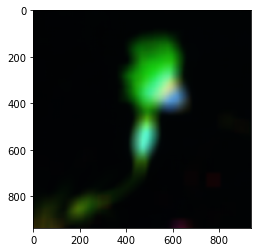


FILTERED IMAGE PROFILE:


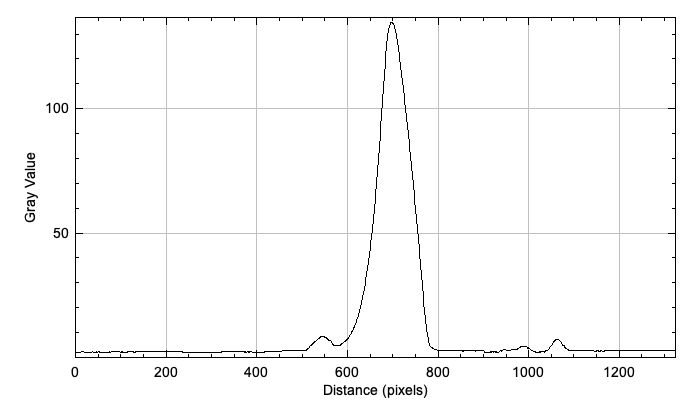

In [21]:
print("\nFILTERED IMAGE:")
ij.py.show(filtered_image)

print("\nFILTERED IMAGE PROFILE:")
Image(f"{OUTPUT_path}")

***

### Build generalize functions out of Macros and PyimageJ
Thanks to pyhton is it possible to combine all the code shown above and make a generalised function that can do the job on the background and run ImageJ tasks just by calling it. Below I show an example of a function that Open an image and computes the profile of this image along the diagonal (from upper-left to bottom_right).

In [22]:
#MACRO OPEN AND SHOW IMAGE & PROFILE

def OpenAndProfile(INPUT_filename = "", path_in = "", path_out = ""):
  
  #CREATE files/folders
    #FOR SPECIFIED dir_in dir_out
    if len(INPUT_filename) == 0:
        INPUT_filename = path_in.rsplit('/', 1)[1]
        path_in = path_in.rsplit('/', 1)[0]
    
    #FOR SPECIFIED INPUT_filename in IMAGE folder (located in the same directory of the notebook) 
    cwd = os.getcwd() #Get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES"
    if len(path_out) == 0:
        path_out = cwd + "/RESULTS"
    
    OUTPUT_filename = INPUT_filename.rsplit('.', 1)[0] + "_profile.png"

    try:
        os.mkdir(path_out)  
    except FileExistsError:
        print("This output directory already exist.")
    print("\n")
    print("The images are imported from: ", path_in)
    print("The results are exported in: ", path_out)
    print("\n\n")
    
    #INITIALIZE arguments
    args_IO = {
    'dir_in': f"{path_in}",          
    'dir_out' : f"{path_out}",
    'filename_in' : f"{INPUT_filename}",
    'filename_out' : f"{OUTPUT_filename}"
    }
    
    #DEFINE ImageJ macro commands
    macro_OpenProfile = """
    
//DEFINE IO
#@ String dir_in
#@ String dir_out
#@ String filename_in
#@ String filename_out
#@output String in
#@output String out

in = dir_in + "/" + filename_in
out = dir_out + "/" + filename_out

//OPEN IMAGE
open(in)

//MAKE AND SAVE PROFILE ON ORIGINAL IMAGE
H = getHeight();
W = getWidth();
makeLine(0, 0, W, H, 5);
run("Plot Profile");
saveAs(".png", out);

//SELECT IMAGE FOR NEXT STEP 
selectWindow(filename_in);

"""
    
    #RUN the Macro
    macro_results = ij.py.run_macro(macro_OpenProfile, args_IO)
    
    #GET the results
    INPUT_path = macro_results.getOutput("in")
    OUTPUT_path = macro_results.getOutput("out")
    results = (INPUT_path, OUTPUT_path)
    
    #PRINT the results
    image = ij.py.active_image_plus()
    print("\nIMAGE:")
    ij.py.show(image, cmap = "gray")
    
    profile = io.imread(f"{OUTPUT_path}")
    print("\nIMAGE PROFILE:")
    ij.py.show(profile, cmap = "gray")
    
    
    #Return the input_file name. This is important because it will be needed to name and save the resulted images
    global filename
    filename = INPUT_filename 

By default, the function takes in input an image of user choise present in the IMAGE folder and output the result in the RESULT folder.

This output directory already exist.


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS



[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test_profile.png]]

IMAGE:


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test_profile.png]]


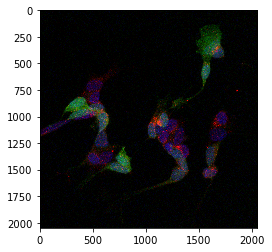


IMAGE PROFILE:


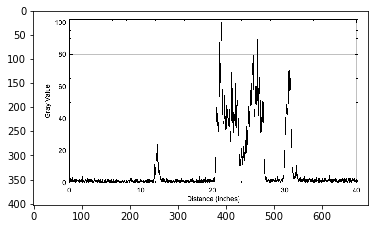

In [23]:
#RUN THE FUNCTION
OpenAndProfile("image_test.tif")

Unfortunatly, the profile plot cannot be displayed from the funtion with the command *Image()* and the *ij.py.show()* does not allow the user to modify the arguments (to increase the size of the image) of the implemented function *pyplot.show()* the documentation is available [here](https://github.com/imagej/pyimagej/blob/master/imagej/__init__.py#:~:text=return%20coords-,def,-show(self%2C%20image)

#### RUN OpenAndProfile() on any images

In the example shown below I show how to run this function on any image. The requested arguments are *path_in*: the path of the file I want to work on, and *path_out:* the path of directory where I want to save the results (in this case the profile plot).

This output directory already exist.


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
The results are exported in:  /Users/nicolascristini/Desktop/Results



[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test1.tif, /Users/nicolascristini/Desktop/Results/image_test1_profile.png]]

IMAGE:


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test1.tif, /Users/nicolascristini/Desktop/Results/image_test1_profile.png]]


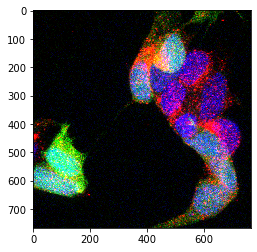


IMAGE PROFILE:


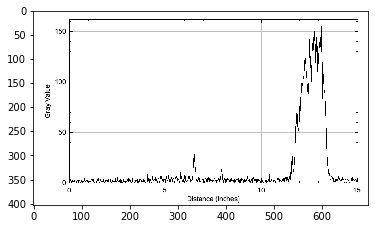

In [24]:
#EXAMPLE:
OpenAndProfile(path_in = "/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test1.tif", 
               path_out = "/Users/nicolascristini/Desktop/Results")

At this point We can process our image with a sequence of python functions embedding different macro commands. 
All the ImageProcessing functions are included in separate anonymous module [here](link).

The Image opened with the function OpenAndProfile() is still the active image and it can be easily called from the notebook. All the following functions will have effect on the active image and they will left the resulted image as the last selected one.

In [25]:
# Before going to the following section it good practice to close all the images and windows open in the background 
# In this way we are sure that only one image enters the processingso pipeline
ij.py.run_macro("""
close("*");      
run("Close All");
""") 

<java object 'org.scijava.script.ScriptModule'>

***

## Image Processing
**By using multiple embedded python function we can process and get results from an image. For example I will perform a filtering, processing, segmentation and analyse particles on a fluorescent nuclei image**

**OPEN IMAGE AND GET PROFILE**

To semplificate the use of ImageJ from the notebook it is possibile to use pre-compiled functions that works as the one showed above to compute the open an image and comute the image profile along the diagonal line. The set of function is located in the ProcessingFunction.py module. The list of functions:
* Open() 
* Profile()
* Filter()
* SubtractBackground()
* Threshold()
* Count()

To show how the functions work, I will include the code in this notebook and proceed with the image analysis.

In [26]:
def Open(INPUT_filename = "", path_in = ""):
    
# make variables  available to all functions and to name and save the following resulted images

# 1 - CREATE path for input/outputt

    # FOR SPECIFIED INPUT_filename in IMAGE folder - located in the directory of the notebook -
    if len(INPUT_filename) == 0:
        INPUT_filename = path_in.rsplit('/', 1)[1]
        path_in = path_in.rsplit('/', 1)[0] + "/"
    
    #FOR SPECIFIED INPUT_filename in IMAGE folder (located in the same directory of the notebook) 
    cwd = os.getcwd() #Get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES/"
        print("\n")
        print("The images are imported from: ", path_in)

# 2 - ImageJ macro text

    # INITIALIZE dictionary with arguments
    args_IO = {
    'dir_in' :f"{path_in}",
    'filename_in' : f"{INPUT_filename}"}

    macro_Open = """
    #@ String dir_in
    #@ String filename_in
    #@output String in

    // CREATE OUTPUT
    in = dir_in + filename_in

    // OPEN IMAGE
    open(in)
    """
    
    # RUN the Macro
    macro_results = ij.py.run_macro(macro_Open, args_IO)

    # PRINT the results
    opened_image = ij.py.active_image_plus()
    ij.py.show(opened_image, cmap = "gray")
    print("\nIMAGE ⬆︎")
    
    print("\nImage path:", f"{path_in + INPUT_filename}")
    
    # MAKE variables available for following steps
    global filename
    filename = INPUT_filename



The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/


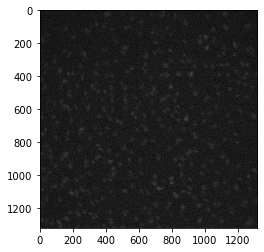


IMAGE ⬆︎

Image path: /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3.tif


In [27]:
Open("image_test3.tif")

In [28]:
def Profile(path_in = "", path_out= ""):
    # 1 - Multiple working situations:
    #a) The image is left activated by the the Open() function, filename is a global variable.
    
    INPUT_filename = filename
    OUTPUT_filename = INPUT_filename.rsplit('.', 1)[0] + "_profile.png" # create OUTPUT_filename

    #b) The profile is computed on a non open image. INPUT_filename of path_in is specified
    
    # MISSING (WORK WITH CLASSES TO IMPLEMENT THIS OPTION)
    
    cwd = os.getcwd() #Get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES"
    if len(path_out) == 0:
        path_out = cwd + "/RESULTS"

    try:
        os.mkdir(path_out)  
    except FileExistsError:
        print("The output directory already exist.")

    # PRINT file/folder info
    print("---------------------------------------------------")
    print("\n")
    print("The images are imported from: ", path_in)
    print("INPUT_filename:", INPUT_filename)
    
    print("\n")
    
    print("The results are exported in: ", path_out)
    print("OUTPUT_filename:", OUTPUT_filename)
    print("\n")
    print("---------------------------------------------------")

# 2 - ImageJ macro profile text

    # INITIALIZE dictionary with arguments
    args_IO = {
    'dir_in' :f"{path_in}",
    'dir_out' : f'{path_out}',
    'filename_in' : f'{INPUT_filename}',
    'filename_out' : f'{OUTPUT_filename}'
    }

    # ImageJ macro commands
    macro_Profile = """
    
//DEFINE IO
#@ String dir_in
#@ String dir_out
#@ String filename_in
#@ String filename_out
#@output String in
#@output String out

title = getTitle();

in = dir_in + "/" + filename_in
out = dir_out + "/" + filename_out

//MAKE AND SAVE PROFILE ON ORIGINAL IMAGE

H = getHeight();                            // get image size
W = getWidth();
makeLine(0, 0, W, H, 5);                    // make line with
run("Plot Profile");                        // make Profile
saveAs(".png", out);
run("Close");

// SELECT THE INPUT IMAGES AS LAST COMMAND FOR THE FOLLOWING STEPS
selectWindow(title);
"""

    #RUN the Macro
    macro_results = ij.py.run_macro(macro_Profile, args_IO)

    #GET the results
    INPUT_path = macro_results.getOutput("in")
    OUTPUT_path = macro_results.getOutput("out")
    results = (INPUT_path, OUTPUT_path)

    profile = io.imread(f"{OUTPUT_path}")
    ij.py.show(profile, cmap = "gray")
    print("IMAGE PROFILE ⬆︎")
    
    # Select the previous active image to reselect it at the end of the function for next steps!
    image = ij.py.active_image_plus()


The output directory already exist.
---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS
OUTPUT_filename: image_test3_profile.png


---------------------------------------------------
[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_profile.png]]


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_profile.png]]


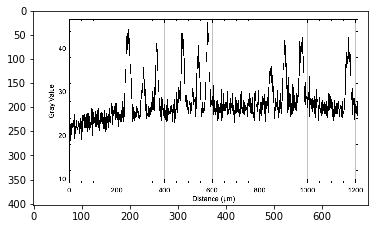

IMAGE PROFILE ⬆︎


In [29]:
Profile()

From the profile showed above we can see that in the image there is a lot of noise and background that must be deleted in order to perform a better analysis. **The purpose of the following pipeline is to identify the nuclei and to count them.**

**FILTER with MEAN**

In [30]:
def Filter(path_in = "", path_out = ""):
    global filename, image
# This functions apply the mean filter plug-in with default radius = 2 pixels.
# the resulted filtered image will be shown to screen and saved to the IMAGES folder.

# 1 - Multiple working situations:
    #a) The image is left activated by the previous function, filename is a global variable.

    INPUT_filename = filename
    OUTPUT_filename = INPUT_filename.rsplit('.', 1)[0] + "_filtered.tif"
    
    # get the IMAGES folder path to save the resulted image
    cwd = os.getcwd() # get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES"
    path_image_out = path_in + "/" + OUTPUT_filename

    # PRINT file/folder info
    print("---------------------------------------------------")
    print("\n")
    print("The images are imported from: ", path_in)
    print("INPUT_filename:", INPUT_filename)
    
    print("\n")
    
    print("The results are exported in: ", path_image_out)
    print("OUTPUT_filename:", OUTPUT_filename)
    print("\n")
    print("---------------------------------------------------")


# 2 - RUN the plugin
    plugin = 'Mean'
    args_mean = {
    'block_radius_x': 4,
    'block_radius_y': 4}

    ij.py.run_plugin(plugin, args_mean)

    # SAVE the resulted filtered image
    filtered = ij.py.active_image_plus()
    numpy_filtered = ij.py.from_java(filtered)
    tifffile.imwrite(path_image_out, numpy_filtered, imagej=True)

    # PRINT the results
    ij.py.show(filtered, cmap = "gray")
    print("\nIMAGE ⬆︎")

    # ACTIVATE resulted image 
    filtered = ij.py.active_image_plus()
    # SAVE resulted filename
    filename = OUTPUT_filename

---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_filtered.tif
OUTPUT_filename: image_test3_filtered.tif


---------------------------------------------------


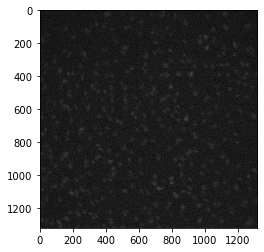


IMAGE ⬆︎


In [31]:
Filter()

The output directory already exist.
---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3_filtered.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS
OUTPUT_filename: image_test3_filtered_profile.png


---------------------------------------------------
No window with the title "image_test.tif" found.


[java.lang.Enum.toString] No window with the title "image_test.tif" found.[java.lang.Enum.toString] 


[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_filtered.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_filtered_profile.png]]


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_filtered.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_filtered_profile.png]]


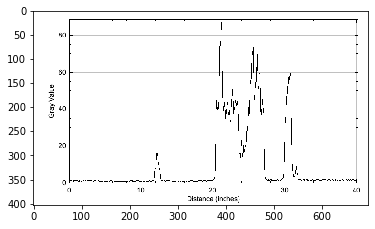

IMAGE PROFILE ⬆︎


In [32]:
Profile()

**SUBTRACT BACKGROUND**
from documentation[here](https://imagej.net/plugins/rolling-ball-background-subtraction):

This plugin tries to correct for uneven illuminated background by using a “rolling ball” algorithm.

A local background value is determined for every pixel by averaging over a very large ball around the pixel. This value is hereafter subtracted from the original image, hopefully removing large spatial variations of the background intensities. The radius should be set to at least the size of the largest object that is not part of the background.

Subtract the background from a nuceli image. The profile plot can show us the amount of noise and background that can be resolved with the application of the right plugin. The first step is to open the image with the macro_OpenProfile.

In [33]:
def SubtractBackground(path_in = "", path_out = ""):
    global filename

# This functions apply a ImageJ macro to use the rolling subtract background plug in with default 50 pixel diameter.
# the resulted subtracted image will be shown to screen and saved to the IMAGES folder.

# 1 - Multiple working situations:
    #a) The image is left activated by the previous function, filename is a global variable.

    INPUT_filename = filename
    OUTPUT_filename = INPUT_filename.rsplit('_', 1)[0] + "_subtracted.tif"
    path_image_out = path_in + "/" + OUTPUT_filename

    # get the IMAGES folder path to save the resulted image
    cwd = os.getcwd() # get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES"
    
    path_image_out = path_in + "/" + OUTPUT_filename

    # PRINT file/folder info
    print("---------------------------------------------------")
    print("\n")
    print("The images are imported from: ", path_in)
    print("INPUT_filename:", INPUT_filename)
    
    print("\n")
    
    print("The results are exported in: ", path_image_out)
    print("OUTPUT_filename:", OUTPUT_filename)
    print("\n")
    print("---------------------------------------------------")


# 2 - ImageJ macro subtract background text
    # INITIALIZE dictionary with arguments

    macro_SubtractBackground = """
// macro commands

run("Enhance Contrast...", "saturated=0.35");               // Run the default contract
run("Subtract Background...", "rolling=50 disable");        // Run the default contract
"""
    ij.py.run_macro(macro_SubtractBackground)

    #SAVE the resulted subtracted image
    subtracted = ij.py.active_image_plus()
    numpy_subtracted = ij.py.from_java(subtracted)
    tifffile.imwrite(path_image_out, numpy_subtracted, imagej=True)

    #PRINT the results
    ij.py.show(subtracted, cmap = "gray")
    print("\nIMAGE ⬆︎")
    
    # ACTIVATE resulted image 
    subtracted = ij.py.active_image_plus()

    # SAVE resulted filename
    filename = OUTPUT_filename

---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3_filtered.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_subtracted.tif
OUTPUT_filename: image_test3_subtracted.tif


---------------------------------------------------


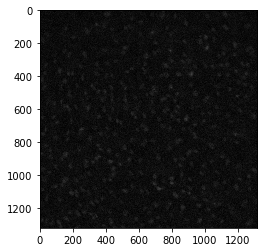


IMAGE ⬆︎


In [34]:
SubtractBackground()

The output directory already exist.
---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3_subtracted.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS
OUTPUT_filename: image_test3_subtracted_profile.png


---------------------------------------------------
[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_subtracted.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_subtracted_profile.png]]


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_subtracted.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_subtracted_profile.png]]


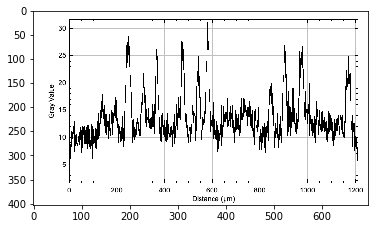

IMAGE PROFILE ⬆︎


In [35]:
Profile()

As shown in the profile, now the pics of intensity are much more higlighted and so we can move to the next step tht consist in the application of the threshold

In [36]:
def Threshold(path_in = "", path_out = ""):
    global filename
# This functions apply a ImageJ macro to applly the Threshold. Now setted as Li.
# the resulted thresholded image will be shown to screen and saved to the IMAGES folder.
# In the following macro, I had to save the image from the macro-text becuase the method used before gave an ERROR

# 1 - Multiple working situations:
    #a) The image is left activated by the previous function, filename is a global variable.

    INPUT_filename = filename
    OUTPUT_filename = INPUT_filename.rsplit('_', 1)[0] + "_thresholded.tif"
    path_image_out = path_in + "/" + OUTPUT_filename

    # get the IMAGES folder path to save the resulted image
    cwd = os.getcwd() # get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES"
    path_image_out = path_in + "/" + OUTPUT_filename

    # PRINT file/folder info
    print("---------------------------------------------------")
    print("INPUT:")
    print("The images are imported from: ", path_in)
    print("INPUT_filename:", INPUT_filename)
    
    print("\n")
    print("OUTPUT:")
    print("The results are exported in: ", path_image_out)
    print("OUTPUT_filename:", OUTPUT_filename)
    print("---------------------------------------------------")

    args_IO = {
    'path_out' : f'{path_image_out}',
    }
    
    macro_Threshold = """
//DEFINE IO
#@ String path_out

// RUN threshold
setAutoThreshold("Default dark");
setOption("BlackBackground", true);
run("Convert to Mask");
run("Watershed");
saveAs("tiff", path_out);
"""
    ij.py.run_macro(macro_Threshold, args_IO)
    
    #SAVE the resulted subtracted image
    thresholded = ij.py.active_image_plus()
    numpy_thresholded = ij.py.from_java(thresholded)
    tifffile.imwrite(path_image_out, numpy_thresholded, imagej=True)

    #PRINT the results
    ij.py.show(thresholded, cmap = "gray")
    print("\nIMAGE ⬆︎")
    
    # SAVE resulted filename
    filename = OUTPUT_filename

---------------------------------------------------
INPUT:
The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3_subtracted.tif


OUTPUT:
The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_thresholded.tif
OUTPUT_filename: image_test3_thresholded.tif
---------------------------------------------------


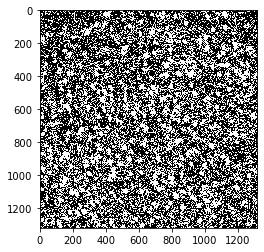


IMAGE ⬆︎


In [37]:
Threshold()

The output directory already exist.
---------------------------------------------------


The images are imported from:  /Users/nicolascristini/IPAN-Project/IPAN/IMAGES
INPUT_filename: image_test3_thresholded.tif


The results are exported in:  /Users/nicolascristini/IPAN-Project/IPAN/RESULTS
OUTPUT_filename: image_test3_thresholded_profile.png


---------------------------------------------------
No window with the title "image_test2.tif" found.


[java.lang.Enum.toString] No window with the title "image_test2.tif" found.[java.lang.Enum.toString] 


[INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_thresholded.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_thresholded_profile.png]]


[java.lang.Enum.toString] [INFO] script:macro.ijm = [[in, out], [/Users/nicolascristini/IPAN-Project/IPAN/IMAGES/image_test3_thresholded.tif, /Users/nicolascristini/IPAN-Project/IPAN/RESULTS/image_test3_thresholded_profile.png]]


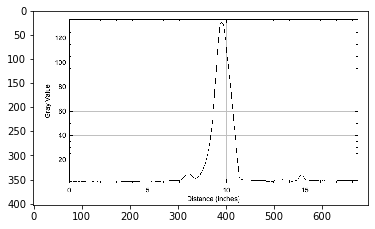

IMAGE PROFILE ⬆︎


In [38]:
Profile()

At the end of this processing steps we obtain a binary image with only white (pixel value = 255) object corresponding to our nuclei and black (pixel value = 0) background.
It is possible now to measure the number of white object by applying the "measuring partciles". The macro will be incorporated in a function *Count()*

**ANALYSE PARTICLES**

In [39]:
def Count(path_in = "", path_out = ""):
    global filename
# This functions use the *Analyse Particles* in a ImageJ macro to applly to count the number of objects in the picture.
# the Result table will show the feature selected in *Set Measurements* In this case we are going to analysis: 
# area, circularity, AR ratio. The resulted table will be saved in the RESULTS folder.
# Besides that, the table will be displayed by using pandas. 

# 1 - Multiple working situations:
    #a) The image is left activated by the previous function, filename is a global variable.

    INPUT_filename = filename
    OUTPUT_filename = INPUT_filename.rsplit('_', 1)[0] + "_data.csv"

    # get the IMAGES folder path to save the resulted image
    cwd = os.getcwd() # get current directory
    if len(path_in) == 0:
        path_in = cwd + "/IMAGES"
    if len(path_out) == 0:
        path_out = cwd + "/RESULTS"
        
    path_data_out = path_out + "/" + OUTPUT_filename

    # PRINT file/folder info
    print("---------------------------------------------------")
    print("INPUT:")
    print("The images are imported from: ", path_in)
    print("INPUT_filename:", INPUT_filename)
    
    print("\n")
    print("OUTPUT:")
    print("The results are exported in: ", path_out)
    print("OUTPUT_filename:", OUTPUT_filename)
    print("---------------------------------------------------")

    args_IO = {
    'path_out' : f'{path_data_out}',
    }

    macro_Count = """
// DEFINE IO
#@ String path_out

// RUN THE MEASUREMENTS
title = getTitle()

run("Set Measurements...", "area shape display redirect=None decimal=3");
run("Analyze Particles...", "size=20-Infinity pixel circularity=0.10-1.00 show=Outlines display exclude clear summarize in_situ");
saveAs("Results", path_out);
"""
    
    ij.py.run_macro(macro_Count, args_IO)
    print("\nThe data are saved as:\n", path_data_out)

    #PRINT the results
    return path_data_out

In [40]:
%%capture
resulted_data = Count()

 	Label	Area	Circ.	AR	Round	Solidity
1	image_test3_thresholded.tif	17.745	0.104	2.123	0.471	0.377
2	image_test3_thresholded.tif	15.633	0.144	2.429	0.412	0.428
3	image_test3_thresholded.tif	13.098	0.178	1.482	0.675	0.521
4	image_test3_thresholded.tif	16.900	0.105	2.598	0.385	0.365
5	image_test3_thresholded.tif	11.830	0.240	3.110	0.322	0.421
6	image_test3_thresholded.tif	10.140	0.129	1.515	0.660	0.505
7	image_test3_thresholded.tif	19.435	0.161	2.100	0.476	0.514
8	image_test3_thresholded.tif	8.873	0.244	1.835	0.545	0.532
9	image_test3_thresholded.tif	25.350	0.136	4.340	0.230	0.585
10	image_test3_thresholded.tif	8.873	0.292	2.168	0.461	0.532
11	image_test3_thresholded.tif	8.450	0.162	2.411	0.415	0.377
12	image_test3_thresholded.tif	9.718	0.183	1.301	0.769	0.411
13	image_test3_thresholded.tif	14.788	0.181	2.507	0.399	0.500
14	image_test3_thresholded.tif	13.098	0.224	1.580	0.633	0.473
15	image_test3_thresholded.tif	14.365	0.234	1.660	0.602	0.482
16	image_test3_thresholded.tif	35.490	0.169	1.

165	image_test3_thresholded.tif	11.408	0.193	1.118	0.895	0.429
166	image_test3_thresholded.tif	8.450	0.245	2.077	0.482	0.426
167	image_test3_thresholded.tif	10.985	0.220	1.590	0.629	0.437
168	image_test3_thresholded.tif	10.140	0.141	1.465	0.683	0.440
169	image_test3_thresholded.tif	11.830	0.184	1.625	0.615	0.533
170	image_test3_thresholded.tif	10.140	0.167	1.834	0.545	0.466
171	image_test3_thresholded.tif	10.985	0.167	1.652	0.605	0.364
172	image_test3_thresholded.tif	8.450	0.158	1.300	0.769	0.354
173	image_test3_thresholded.tif	93.373	0.128	1.618	0.618	0.629
174	image_test3_thresholded.tif	17.323	0.146	4.001	0.250	0.432
175	image_test3_thresholded.tif	11.830	0.125	1.458	0.686	0.394
176	image_test3_thresholded.tif	9.295	0.151	3.135	0.319	0.373
177	image_test3_thresholded.tif	15.633	0.108	1.332	0.751	0.400
178	image_test3_thresholded.tif	10.563	0.117	1.460	0.685	0.362
179	image_test3_thresholded.tif	168.578	0.118	1.723	0.580	0.670
180	image_test3_thresholded.tif	12.675	0.269	1.987	0.503	

310	image_test3_thresholded.tif	9.295	0.175	2.676	0.374	0.404
311	image_test3_thresholded.tif	19.435	0.217	1.545	0.647	0.597
312	image_test3_thresholded.tif	8.873	0.127	3.553	0.281	0.412
313	image_test3_thresholded.tif	15.210	0.135	2.388	0.419	0.377
314	image_test3_thresholded.tif	13.098	0.107	1.394	0.717	0.363
315	image_test3_thresholded.tif	19.435	0.137	1.201	0.833	0.451
316	image_test3_thresholded.tif	10.140	0.110	1.260	0.793	0.414
317	image_test3_thresholded.tif	13.943	0.215	1.836	0.545	0.550
318	image_test3_thresholded.tif	11.830	0.109	2.381	0.420	0.346
319	image_test3_thresholded.tif	13.943	0.223	3.082	0.325	0.541
320	image_test3_thresholded.tif	12.253	0.153	2.729	0.366	0.509
321	image_test3_thresholded.tif	18.168	0.358	1.584	0.631	0.662
322	image_test3_thresholded.tif	10.985	0.115	2.077	0.482	0.359
323	image_test3_thresholded.tif	21.970	0.201	1.605	0.623	0.559
324	image_test3_thresholded.tif	9.718	0.220	2.607	0.384	0.495
325	image_test3_thresholded.tif	15.210	0.186	2.227	0.449	0

467	image_test3_thresholded.tif	12.253	0.246	2.189	0.457	0.479
468	image_test3_thresholded.tif	19.013	0.112	1.531	0.653	0.402
469	image_test3_thresholded.tif	10.563	0.214	1.703	0.587	0.510
470	image_test3_thresholded.tif	8.450	0.585	1.725	0.580	0.800
471	image_test3_thresholded.tif	10.563	0.504	1.162	0.861	0.758
472	image_test3_thresholded.tif	20.703	0.110	1.826	0.548	0.419
473	image_test3_thresholded.tif	12.675	0.107	2.465	0.406	0.408
474	image_test3_thresholded.tif	8.450	0.151	1.683	0.594	0.370
475	image_test3_thresholded.tif	16.900	0.150	1.999	0.500	0.485
476	image_test3_thresholded.tif	10.140	0.160	3.396	0.295	0.393
477	image_test3_thresholded.tif	18.168	0.142	1.232	0.812	0.531
478	image_test3_thresholded.tif	10.985	0.193	1.748	0.572	0.542
479	image_test3_thresholded.tif	18.590	0.269	1.769	0.565	0.629
480	image_test3_thresholded.tif	14.365	0.257	1.845	0.542	0.607
481	image_test3_thresholded.tif	9.295	0.224	1.769	0.565	0.550
482	image_test3_thresholded.tif	24.928	0.360	1.347	0.742	0

624	image_test3_thresholded.tif	21.125	0.136	1.466	0.682	0.488
625	image_test3_thresholded.tif	17.323	0.151	1.184	0.844	0.543
626	image_test3_thresholded.tif	10.563	0.131	1.668	0.599	0.394
627	image_test3_thresholded.tif	8.873	0.170	1.442	0.694	0.477
628	image_test3_thresholded.tif	9.718	0.383	1.789	0.559	0.613
629	image_test3_thresholded.tif	12.675	0.349	1.502	0.666	0.659
630	image_test3_thresholded.tif	25.350	0.429	1.892	0.529	0.682
631	image_test3_thresholded.tif	17.323	0.130	1.583	0.632	0.471
632	image_test3_thresholded.tif	11.408	0.154	1.836	0.545	0.462
633	image_test3_thresholded.tif	19.435	0.113	1.788	0.559	0.500
634	image_test3_thresholded.tif	78.585	0.118	1.282	0.780	0.614
635	image_test3_thresholded.tif	13.098	0.215	1.421	0.704	0.492
636	image_test3_thresholded.tif	9.718	0.622	1.359	0.736	0.793
637	image_test3_thresholded.tif	12.253	0.168	2.249	0.445	0.397
638	image_test3_thresholded.tif	13.098	0.114	1.488	0.672	0.332
639	image_test3_thresholded.tif	13.098	0.196	1.629	0.614	0

797	image_test3_thresholded.tif	13.520	0.320	1.517	0.659	0.646
798	image_test3_thresholded.tif	10.140	0.257	1.152	0.868	0.578
799	image_test3_thresholded.tif	19.858	0.157	1.950	0.513	0.422
800	image_test3_thresholded.tif	24.505	0.155	2.865	0.349	0.489
801	image_test3_thresholded.tif	12.253	0.199	2.017	0.496	0.450
802	image_test3_thresholded.tif	114.075	0.152	1.686	0.593	0.687
803	image_test3_thresholded.tif	11.408	0.137	2.501	0.400	0.462
804	image_test3_thresholded.tif	11.830	0.200	3.056	0.327	0.483
805	image_test3_thresholded.tif	9.295	0.162	1.487	0.673	0.431
806	image_test3_thresholded.tif	50.700	0.376	2.135	0.468	0.714
807	image_test3_thresholded.tif	14.365	0.363	2.444	0.409	0.607
808	image_test3_thresholded.tif	10.985	0.169	2.161	0.463	0.394
809	image_test3_thresholded.tif	16.055	0.106	2.893	0.346	0.339
810	image_test3_thresholded.tif	19.858	0.102	1.474	0.678	0.429
811	image_test3_thresholded.tif	8.873	0.140	2.002	0.500	0.393
812	image_test3_thresholded.tif	10.985	0.220	1.978	0.506

1002	image_test3_thresholded.tif	18.590	0.114	1.296	0.771	0.468
1003	image_test3_thresholded.tif	10.563	0.214	2.017	0.496	0.515
1004	image_test3_thresholded.tif	9.295	0.465	2.076	0.482	0.677
1005	image_test3_thresholded.tif	21.125	0.357	1.662	0.602	0.621
1006	image_test3_thresholded.tif	12.675	0.449	1.675	0.597	0.741
1007	image_test3_thresholded.tif	38.448	0.117	1.988	0.503	0.500
1008	image_test3_thresholded.tif	10.563	0.128	1.918	0.521	0.403
1009	image_test3_thresholded.tif	31.688	0.140	1.265	0.790	0.490
1010	image_test3_thresholded.tif	13.098	0.119	1.919	0.521	0.341
1011	image_test3_thresholded.tif	16.900	0.115	1.348	0.742	0.396
1012	image_test3_thresholded.tif	18.590	0.115	1.582	0.632	0.466
1013	image_test3_thresholded.tif	15.633	0.121	2.623	0.381	0.383
1014	image_test3_thresholded.tif	17.745	0.235	1.781	0.561	0.575
1015	image_test3_thresholded.tif	8.873	0.200	3.214	0.311	0.429
1016	image_test3_thresholded.tif	13.098	0.139	1.457	0.686	0.446
1017	image_test3_thresholded.tif	8.873	0.2

1142	image_test3_thresholded.tif	12.675	0.195	2.170	0.461	0.484
1143	image_test3_thresholded.tif	15.633	0.254	1.091	0.916	0.617
1144	image_test3_thresholded.tif	8.873	0.304	1.279	0.782	0.627
1145	image_test3_thresholded.tif	19.013	0.101	1.324	0.755	0.450
1146	image_test3_thresholded.tif	19.858	0.106	1.658	0.603	0.407
1147	image_test3_thresholded.tif	21.970	0.107	2.195	0.456	0.398
1148	image_test3_thresholded.tif	9.295	0.155	3.598	0.278	0.506
1149	image_test3_thresholded.tif	16.478	0.190	2.592	0.386	0.481
1150	image_test3_thresholded.tif	13.098	0.187	1.498	0.667	0.500
1151	image_test3_thresholded.tif	13.098	0.113	1.342	0.745	0.446
1152	image_test3_thresholded.tif	8.873	0.180	1.945	0.514	0.447
1153	image_test3_thresholded.tif	9.295	0.145	1.617	0.619	0.355
1154	image_test3_thresholded.tif	15.210	0.161	1.484	0.674	0.453
1155	image_test3_thresholded.tif	8.450	0.214	2.542	0.393	0.526
1156	image_test3_thresholded.tif	9.295	0.629	1.261	0.793	0.772
1157	image_test3_thresholded.tif	15.210	0.105	

1330	image_test3_thresholded.tif	14.365	0.131	2.112	0.474	0.428
1331	image_test3_thresholded.tif	13.520	0.270	2.997	0.334	0.571
1332	image_test3_thresholded.tif	9.295	0.147	1.194	0.837	0.463
1333	image_test3_thresholded.tif	10.985	0.240	1.224	0.817	0.515
1334	image_test3_thresholded.tif	8.450	0.619	1.620	0.617	0.755
1335	image_test3_thresholded.tif	8.873	0.116	1.946	0.514	0.294
1336	image_test3_thresholded.tif	12.253	0.281	2.062	0.485	0.580
1337	image_test3_thresholded.tif	8.450	0.153	1.646	0.608	0.444
1338	image_test3_thresholded.tif	12.675	0.265	2.014	0.497	0.625
1339	image_test3_thresholded.tif	15.210	0.131	1.148	0.871	0.462
1340	image_test3_thresholded.tif	8.873	0.444	1.369	0.731	0.667
1341	image_test3_thresholded.tif	8.873	0.348	1.275	0.784	0.656
1342	image_test3_thresholded.tif	17.323	0.282	1.532	0.653	0.651
1343	image_test3_thresholded.tif	21.548	0.121	1.401	0.714	0.526
1344	image_test3_thresholded.tif	8.873	0.154	2.078	0.481	0.408
1345	image_test3_thresholded.tif	34.223	0.101	2

1571	image_test3_thresholded.tif	19.435	0.563	1.404	0.712	0.786
1572	image_test3_thresholded.tif	11.408	0.275	1.320	0.758	0.495
1573	image_test3_thresholded.tif	17.745	0.124	1.538	0.650	0.472
1574	image_test3_thresholded.tif	8.873	0.248	3.145	0.318	0.553
1575	image_test3_thresholded.tif	9.295	0.147	2.638	0.379	0.411
1576	image_test3_thresholded.tif	9.295	0.352	1.218	0.821	0.595
1577	image_test3_thresholded.tif	11.408	0.231	1.889	0.529	0.470
1578	image_test3_thresholded.tif	19.435	0.131	2.512	0.398	0.393
1579	image_test3_thresholded.tif	24.083	0.101	1.794	0.557	0.465
1580	image_test3_thresholded.tif	17.745	0.112	1.938	0.516	0.464
1581	image_test3_thresholded.tif	220.545	0.101	1.490	0.671	0.642
1582	image_test3_thresholded.tif	19.858	0.124	1.802	0.555	0.439
1583	image_test3_thresholded.tif	16.478	0.167	1.988	0.503	0.561
1584	image_test3_thresholded.tif	24.083	0.123	2.175	0.460	0.479
1585	image_test3_thresholded.tif	11.408	0.421	1.611	0.621	0.692
1586	image_test3_thresholded.tif	10.140	0.

1757	image_test3_thresholded.tif	12.253	0.102	1.419	0.705	0.365
1758	image_test3_thresholded.tif	24.505	0.147	1.686	0.593	0.489
1759	image_test3_thresholded.tif	21.970	0.117	2.014	0.497	0.378
1760	image_test3_thresholded.tif	16.478	0.173	2.661	0.376	0.473
1761	image_test3_thresholded.tif	18.590	0.247	1.401	0.714	0.553
1762	image_test3_thresholded.tif	11.830	0.390	1.578	0.634	0.636
1763	image_test3_thresholded.tif	14.365	0.347	1.589	0.629	0.613
1764	image_test3_thresholded.tif	91.260	0.219	1.343	0.745	0.716
1765	image_test3_thresholded.tif	198.575	0.145	1.348	0.742	0.728
1766	image_test3_thresholded.tif	10.140	0.195	2.207	0.453	0.516
1767	image_test3_thresholded.tif	25.350	0.110	1.351	0.740	0.456
1768	image_test3_thresholded.tif	13.943	0.132	1.767	0.566	0.384
1769	image_test3_thresholded.tif	16.478	0.106	1.740	0.575	0.402
1770	image_test3_thresholded.tif	13.098	0.240	2.183	0.458	0.574
1771	image_test3_thresholded.tif	12.253	0.157	2.828	0.354	0.450
1772	image_test3_thresholded.tif	30.843

1942	image_test3_thresholded.tif	22.393	0.123	1.897	0.527	0.442
1943	image_test3_thresholded.tif	8.873	0.568	1.855	0.539	0.724
1944	image_test3_thresholded.tif	40.560	0.111	1.569	0.637	0.541
1945	image_test3_thresholded.tif	10.140	0.216	2.047	0.489	0.516
1946	image_test3_thresholded.tif	13.098	0.178	2.539	0.394	0.443
1947	image_test3_thresholded.tif	19.858	0.336	1.078	0.928	0.610
1948	image_test3_thresholded.tif	16.478	0.102	1.033	0.968	0.368
1949	image_test3_thresholded.tif	16.900	0.177	1.149	0.870	0.497
1950	image_test3_thresholded.tif	58.305	0.240	1.345	0.744	0.651
1951	image_test3_thresholded.tif	21.548	0.272	1.967	0.509	0.586
1952	image_test3_thresholded.tif	11.408	0.201	1.735	0.576	0.524
1953	image_test3_thresholded.tif	10.985	0.132	1.595	0.627	0.340
1954	image_test3_thresholded.tif	12.253	0.122	2.320	0.431	0.365
1955	image_test3_thresholded.tif	15.210	0.146	2.770	0.361	0.379
1956	image_test3_thresholded.tif	8.873	0.244	2.182	0.458	0.472
1957	image_test3_thresholded.tif	12.675	0.

2133	image_test3_thresholded.tif	12.253	0.420	1.604	0.623	0.652
2134	image_test3_thresholded.tif	11.830	0.447	1.332	0.751	0.709
2135	image_test3_thresholded.tif	13.943	0.156	1.462	0.684	0.402
2136	image_test3_thresholded.tif	9.718	0.434	1.609	0.621	0.667
2137	image_test3_thresholded.tif	18.590	0.170	3.579	0.279	0.500
2138	image_test3_thresholded.tif	19.435	0.145	1.991	0.502	0.411
2139	image_test3_thresholded.tif	10.563	0.194	2.751	0.363	0.472
2140	image_test3_thresholded.tif	22.393	0.120	1.500	0.667	0.429
2141	image_test3_thresholded.tif	11.830	0.176	3.382	0.296	0.438
2142	image_test3_thresholded.tif	9.295	0.178	3.029	0.330	0.436
2143	image_test3_thresholded.tif	9.295	0.265	3.471	0.288	0.468
2144	image_test3_thresholded.tif	13.520	0.128	1.668	0.600	0.451
2145	image_test3_thresholded.tif	17.745	0.132	1.300	0.769	0.500
2146	image_test3_thresholded.tif	9.295	0.358	2.596	0.385	0.603
2147	image_test3_thresholded.tif	9.295	0.279	2.781	0.360	0.550
2148	image_test3_thresholded.tif	11.408	0.391

2334	image_test3_thresholded.tif	42.673	0.442	1.746	0.573	0.771
2335	image_test3_thresholded.tif	25.773	0.236	1.669	0.599	0.635
2336	image_test3_thresholded.tif	10.563	0.424	1.414	0.707	0.538
2337	image_test3_thresholded.tif	19.435	0.243	2.496	0.401	0.551
2338	image_test3_thresholded.tif	12.675	0.239	1.347	0.742	0.496
2339	image_test3_thresholded.tif	10.563	0.362	1.441	0.694	0.649
2340	image_test3_thresholded.tif	130.975	0.217	1.526	0.655	0.764
2341	image_test3_thresholded.tif	16.055	0.472	1.573	0.636	0.745
2342	image_test3_thresholded.tif	19.435	0.117	1.792	0.558	0.434
2343	image_test3_thresholded.tif	14.788	0.139	2.258	0.443	0.424
2344	image_test3_thresholded.tif	17.323	0.352	2.631	0.380	0.586
2345	image_test3_thresholded.tif	15.210	0.222	1.965	0.509	0.558
2346	image_test3_thresholded.tif	24.083	0.130	1.423	0.703	0.551
2347	image_test3_thresholded.tif	10.985	0.163	1.565	0.639	0.416
2348	image_test3_thresholded.tif	13.098	0.153	2.817	0.355	0.459
2349	image_test3_thresholded.tif	9.718	

2524	image_test3_thresholded.tif	13.520	0.117	1.941	0.515	0.405
2525	image_test3_thresholded.tif	16.478	0.293	2.296	0.435	0.696
2526	image_test3_thresholded.tif	21.125	0.130	1.557	0.642	0.448
2527	image_test3_thresholded.tif	14.365	0.189	1.974	0.506	0.553
2528	image_test3_thresholded.tif	22.393	0.129	2.389	0.419	0.515
2529	image_test3_thresholded.tif	24.928	0.240	1.509	0.663	0.652
2530	image_test3_thresholded.tif	27.040	0.106	2.741	0.365	0.417
2531	image_test3_thresholded.tif	11.830	0.148	1.831	0.546	0.471
2532	image_test3_thresholded.tif	27.040	0.153	1.742	0.574	0.552
2533	image_test3_thresholded.tif	15.210	0.124	2.212	0.452	0.377
2534	image_test3_thresholded.tif	13.943	0.313	1.618	0.618	0.635
2535	image_test3_thresholded.tif	8.450	0.225	2.488	0.402	0.465
2536	image_test3_thresholded.tif	10.140	0.167	1.207	0.829	0.485
2537	image_test3_thresholded.tif	8.450	0.217	1.210	0.826	0.488
2538	image_test3_thresholded.tif	23.238	0.188	1.631	0.613	0.553
2539	image_test3_thresholded.tif	19.013	0.

2686	image_test3_thresholded.tif	11.408	0.213	1.492	0.670	0.529
2687	image_test3_thresholded.tif	8.873	0.214	2.309	0.433	0.457
2688	image_test3_thresholded.tif	13.520	0.255	2.182	0.458	0.547
2689	image_test3_thresholded.tif	12.253	0.157	2.725	0.367	0.417
2690	image_test3_thresholded.tif	10.140	0.248	1.666	0.600	0.500
2691	image_test3_thresholded.tif	15.210	0.100	1.650	0.606	0.429
2692	image_test3_thresholded.tif	16.900	0.143	1.918	0.521	0.421
2693	image_test3_thresholded.tif	13.520	0.123	3.574	0.280	0.460
2694	image_test3_thresholded.tif	10.140	0.133	1.842	0.543	0.475
2695	image_test3_thresholded.tif	12.253	0.222	1.481	0.675	0.464
2696	image_test3_thresholded.tif	57.038	0.115	2.254	0.444	0.445
2697	image_test3_thresholded.tif	18.168	0.267	1.956	0.511	0.551
2698	image_test3_thresholded.tif	8.873	0.281	1.700	0.588	0.568
2699	image_test3_thresholded.tif	158.015	0.233	1.791	0.558	0.735
2700	image_test3_thresholded.tif	10.563	0.267	1.926	0.519	0.602
2701	image_test3_thresholded.tif	24.083	0

2833	image_test3_thresholded.tif	9.295	0.367	1.549	0.645	0.629
2834	image_test3_thresholded.tif	11.408	0.148	2.134	0.469	0.470
2835	image_test3_thresholded.tif	17.323	0.253	1.418	0.705	0.656
2836	image_test3_thresholded.tif	18.590	0.107	2.555	0.391	0.431
2837	image_test3_thresholded.tif	11.408	0.132	2.068	0.484	0.403
2838	image_test3_thresholded.tif	12.253	0.177	1.335	0.749	0.492
2839	image_test3_thresholded.tif	10.563	0.255	3.097	0.323	0.568
2840	image_test3_thresholded.tif	10.563	0.197	1.821	0.549	0.521
2841	image_test3_thresholded.tif	13.943	0.252	1.272	0.786	0.545
2842	image_test3_thresholded.tif	20.280	0.163	1.872	0.534	0.513
2843	image_test3_thresholded.tif	18.590	0.128	2.075	0.482	0.500
2844	image_test3_thresholded.tif	12.253	0.290	1.681	0.595	0.542
2845	image_test3_thresholded.tif	16.055	0.181	1.375	0.727	0.539
2846	image_test3_thresholded.tif	16.478	0.320	1.969	0.508	0.645
2847	image_test3_thresholded.tif	19.858	0.117	1.327	0.754	0.433
2848	image_test3_thresholded.tif	11.408	0

3040	image_test3_thresholded.tif	13.943	0.279	1.719	0.582	0.635
3041	image_test3_thresholded.tif	16.055	0.226	1.542	0.648	0.563
3042	image_test3_thresholded.tif	14.365	0.260	1.531	0.653	0.596
3043	image_test3_thresholded.tif	37.180	0.170	2.407	0.415	0.573
3044	image_test3_thresholded.tif	10.985	0.214	1.235	0.809	0.486
3045	image_test3_thresholded.tif	10.985	0.330	1.499	0.667	0.650
3046	image_test3_thresholded.tif	9.718	0.434	1.935	0.517	0.597
3047	image_test3_thresholded.tif	11.408	0.219	1.180	0.848	0.529
3048	image_test3_thresholded.tif	15.633	0.130	1.455	0.687	0.510
3049	image_test3_thresholded.tif	9.295	0.224	1.447	0.691	0.468
3050	image_test3_thresholded.tif	12.253	0.277	1.721	0.581	0.611
3051	image_test3_thresholded.tif	13.098	0.191	1.796	0.557	0.492
3052	image_test3_thresholded.tif	18.168	0.206	1.538	0.650	0.573
3053	image_test3_thresholded.tif	21.125	0.153	1.070	0.934	0.549
3054	image_test3_thresholded.tif	14.365	0.227	2.293	0.436	0.567
3055	image_test3_thresholded.tif	23.660	0.

3242	image_test3_thresholded.tif	8.450	0.371	1.884	0.531	0.597
3243	image_test3_thresholded.tif	10.140	0.348	1.797	0.557	0.640
3244	image_test3_thresholded.tif	12.253	0.194	1.261	0.793	0.453
3245	image_test3_thresholded.tif	32.955	0.176	3.288	0.304	0.595
3246	image_test3_thresholded.tif	9.295	0.168	1.969	0.508	0.494
3247	image_test3_thresholded.tif	15.633	0.167	2.534	0.395	0.497
3248	image_test3_thresholded.tif	19.013	0.109	1.351	0.740	0.360
3249	image_test3_thresholded.tif	18.590	0.150	2.223	0.450	0.423
3250	image_test3_thresholded.tif	22.393	0.186	1.572	0.636	0.473
3251	image_test3_thresholded.tif	17.323	0.267	1.940	0.515	0.586
3252	image_test3_thresholded.tif	24.505	0.103	2.344	0.427	0.433
3253	image_test3_thresholded.tif	11.408	0.188	2.267	0.441	0.435
3254	image_test3_thresholded.tif	10.563	0.205	2.471	0.405	0.543
3255	image_test3_thresholded.tif	10.563	0.239	1.811	0.552	0.510
3256	image_test3_thresholded.tif	10.985	0.220	1.460	0.685	0.515
3257	image_test3_thresholded.tif	9.718	0.2

3453	image_test3_thresholded.tif	10.563	0.169	1.731	0.578	0.442
3454	image_test3_thresholded.tif	21.548	0.109	1.675	0.597	0.416
3455	image_test3_thresholded.tif	9.718	0.201	2.427	0.412	0.455
3456	image_test3_thresholded.tif	24.083	0.148	1.484	0.674	0.483
3457	image_test3_thresholded.tif	11.408	0.582	2.445	0.409	0.720
3458	image_test3_thresholded.tif	19.435	0.112	1.955	0.511	0.418
3459	image_test3_thresholded.tif	10.563	0.181	1.718	0.582	0.549
3460	image_test3_thresholded.tif	10.140	0.149	1.131	0.884	0.397
3461	image_test3_thresholded.tif	36.335	0.106	1.710	0.585	0.531
3462	image_test3_thresholded.tif	16.478	0.107	1.493	0.670	0.424
3463	image_test3_thresholded.tif	9.295	0.256	1.539	0.650	0.579
3464	image_test3_thresholded.tif	14.788	0.157	3.228	0.310	0.470
3465	image_test3_thresholded.tif	15.633	0.107	3.433	0.291	0.413
3466	image_test3_thresholded.tif	89.993	0.275	2.030	0.493	0.675
3467	image_test3_thresholded.tif	11.830	0.134	2.214	0.452	0.455
3468	image_test3_thresholded.tif	14.365	0.

3705	image_test3_thresholded.tif	24.505	0.114	2.101	0.476	0.496
3706	image_test3_thresholded.tif	11.830	0.165	1.654	0.605	0.397
3707	image_test3_thresholded.tif	11.830	0.331	1.885	0.531	0.718
3708	image_test3_thresholded.tif	13.098	0.215	1.611	0.621	0.544
3709	image_test3_thresholded.tif	19.858	0.126	2.205	0.454	0.505
3710	image_test3_thresholded.tif	12.675	0.132	2.386	0.419	0.444
3711	image_test3_thresholded.tif	10.140	0.126	3.334	0.300	0.308
3712	image_test3_thresholded.tif	24.928	0.111	1.536	0.651	0.378
3713	image_test3_thresholded.tif	9.295	0.311	1.831	0.546	0.647
3714	image_test3_thresholded.tif	113.653	0.167	1.344	0.744	0.655
3715	image_test3_thresholded.tif	14.788	0.124	2.913	0.343	0.402
3716	image_test3_thresholded.tif	13.943	0.137	3.079	0.325	0.437
3717	image_test3_thresholded.tif	17.745	0.138	1.479	0.676	0.528
3718	image_test3_thresholded.tif	18.168	0.253	2.106	0.475	0.541
3719	image_test3_thresholded.tif	60.418	0.124	1.928	0.519	0.539
3720	image_test3_thresholded.tif	19.858	

3945	image_test3_thresholded.tif	14.365	0.256	1.293	0.773	0.527
3946	image_test3_thresholded.tif	18.168	0.364	1.650	0.606	0.647
3947	image_test3_thresholded.tif	9.718	0.390	2.820	0.355	0.630
3948	image_test3_thresholded.tif	11.408	0.391	2.029	0.493	0.692
3949	image_test3_thresholded.tif	226.883	0.152	1.331	0.751	0.738
3950	image_test3_thresholded.tif	16.055	0.138	1.579	0.633	0.478
3951	image_test3_thresholded.tif	11.830	0.529	1.682	0.594	0.718
3952	image_test3_thresholded.tif	17.745	0.108	1.085	0.922	0.372
3953	image_test3_thresholded.tif	17.745	0.105	2.232	0.448	0.452
3954	image_test3_thresholded.tif	20.703	0.127	1.640	0.610	0.426
3955	image_test3_thresholded.tif	18.168	0.170	1.986	0.504	0.467
3956	image_test3_thresholded.tif	12.253	0.273	3.846	0.260	0.574
3957	image_test3_thresholded.tif	10.140	0.269	2.549	0.392	0.571
3958	image_test3_thresholded.tif	28.730	0.109	1.747	0.572	0.455
3959	image_test3_thresholded.tif	9.295	0.390	1.464	0.683	0.698
3960	image_test3_thresholded.tif	12.675	0

4116	image_test3_thresholded.tif	9.295	0.128	6.205	0.161	0.346
4117	image_test3_thresholded.tif	28.308	0.272	2.679	0.373	0.684
4118	image_test3_thresholded.tif	22.393	0.110	2.820	0.355	0.339
4119	image_test3_thresholded.tif	8.873	0.135	1.650	0.606	0.365
4120	image_test3_thresholded.tif	12.675	0.269	1.642	0.609	0.536
4121	image_test3_thresholded.tif	18.590	0.227	1.454	0.688	0.672
4122	image_test3_thresholded.tif	8.873	0.175	1.773	0.564	0.483
4123	image_test3_thresholded.tif	22.815	0.110	1.246	0.803	0.396
4124	image_test3_thresholded.tif	10.140	0.191	1.611	0.621	0.505
4125	image_test3_thresholded.tif	8.873	0.200	2.498	0.400	0.447
4126	image_test3_thresholded.tif	9.718	0.272	3.154	0.317	0.548
4127	image_test3_thresholded.tif	9.718	0.230	1.727	0.579	0.554
4128	image_test3_thresholded.tif	13.943	0.140	1.524	0.656	0.431
4129	image_test3_thresholded.tif	16.900	0.161	2.023	0.494	0.530
4130	image_test3_thresholded.tif	8.450	0.162	2.363	0.423	0.444
4131	image_test3_thresholded.tif	10.140	0.248	1

The .csv file has been saved in the output folder and now we can finally use pandas to import the dataset and work on the results.

In [41]:
#Import libraries for data management and visualization
#import seaborn as sns
import pandas as pd

#Clean dataframe
Data = pd.read_csv(resulted_data, header = 0, sep=',', encoding='latin-1', index_col=0)
Data = Data.drop("Label", axis = 1)
Data.rename(columns={'Circ.': 'Circularity'}, inplace=True)
Data_summary = Data.describe()

print(Data)
print("\n", Data_summary)
print("\nTotal number of nuclei:\t", Data.shape[0])

        Area  Circularity     AR  Round  Solidity
                                                 
1     17.745        0.104  2.123  0.471     0.377
2     15.633        0.144  2.429  0.412     0.428
3     13.098        0.178  1.482  0.675     0.521
4     16.900        0.105  2.598  0.385     0.365
5     11.830        0.240  3.110  0.322     0.421
...      ...          ...    ...    ...       ...
4127   9.718        0.230  1.727  0.579     0.554
4128  13.943        0.140  1.524  0.656     0.431
4129  16.900        0.161  2.023  0.494     0.530
4130   8.450        0.162  2.363  0.423     0.444
4131  10.140        0.248  1.263  0.792     0.558

[4131 rows x 5 columns]

               Area  Circularity           AR        Round     Solidity
count  4131.000000  4131.000000  4131.000000  4131.000000  4131.000000
mean     18.919164     0.211937     1.867562     0.583880     0.512933
std      23.826684     0.117986     0.607237     0.160265     0.103464
min       8.450000     0.100000     1.0

***
### Import functions from a module.py
Now that the functions run correctly it is possible to collect them in a module.py and import the required one to run the image analysis. 

An example of image processing by using the function imported from the module.py is shown in the following notebook:
03 - Working with IPAN module pt.3 

***
***